In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [2]:
data = pd.read_csv("Carros.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
filtro = data.loc[:,["Price", "Prod. year", "Category", "Manufacturer",  "Model","Gear box type", "Mileage", 'Cylinders','Engine volume', 'Airbags']]

In [4]:
filtro

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
0,13328,2010,Jeep,LEXUS,RX 450,Automatic,186005 km,6.0,3.5,12
1,16621,2011,Jeep,CHEVROLET,Equinox,Tiptronic,192000 km,6.0,3,8
2,8467,2006,Hatchback,HONDA,FIT,Variator,200000 km,4.0,1.3,2
3,3607,2011,Jeep,FORD,Escape,Automatic,168966 km,4.0,2.5,0
4,11726,2014,Hatchback,HONDA,FIT,Automatic,91901 km,4.0,1.3,4
...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,Coupe,MERCEDES-BENZ,CLK 200,Manual,300000 km,4.0,2.0 Turbo,5
19233,15681,2011,Sedan,HYUNDAI,Sonata,Tiptronic,161600 km,4.0,2.4,8
19234,26108,2010,Jeep,HYUNDAI,Tucson,Automatic,116365 km,4.0,2,4
19235,5331,2007,Jeep,CHEVROLET,Captiva,Automatic,51258 km,4.0,2,4


In [5]:
filtro.isnull().sum()

Price            0
Prod. year       0
Category         0
Manufacturer     0
Model            0
Gear box type    0
Mileage          0
Cylinders        0
Engine volume    0
Airbags          0
dtype: int64

In [6]:
filtro.tail(10)

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
19227,29793,2014,Sedan,MERCEDES-BENZ,E 350,Automatic,219030 km,6.0,3.5,12
19228,706,2008,Sedan,MERCEDES-BENZ,E 350,Automatic,122874 km,6.0,3.5,12
19229,50,2008,Hatchback,TOYOTA,Prius,Automatic,150000 km,4.0,1.5,6
19230,470,2011,Hatchback,TOYOTA,Prius,Automatic,307325 km,4.0,1.8,12
19231,5802,2013,Sedan,MERCEDES-BENZ,E 350,Automatic,107800 km,6.0,3.5,12
19232,8467,1999,Coupe,MERCEDES-BENZ,CLK 200,Manual,300000 km,4.0,2.0 Turbo,5
19233,15681,2011,Sedan,HYUNDAI,Sonata,Tiptronic,161600 km,4.0,2.4,8
19234,26108,2010,Jeep,HYUNDAI,Tucson,Automatic,116365 km,4.0,2,4
19235,5331,2007,Jeep,CHEVROLET,Captiva,Automatic,51258 km,4.0,2,4
19236,470,2012,Sedan,HYUNDAI,Sonata,Automatic,186923 km,4.0,2.4,12


In [7]:
filtro.drop(filtro.loc[filtro['Price']<=500].index, inplace=True)

In [8]:
filtro.tail(10)

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
19224,19130,2014,Sedan,KIA,Optima ex,Automatic,35800 km,4.0,2.4,12
19225,8781,2007,Goods wagon,OPEL,Combo,Manual,236000 km,4.0,1.7 Turbo,4
19226,7840,2003,Sedan,NISSAN,Skyline,Tiptronic,220000 km,6.0,3,0
19227,29793,2014,Sedan,MERCEDES-BENZ,E 350,Automatic,219030 km,6.0,3.5,12
19228,706,2008,Sedan,MERCEDES-BENZ,E 350,Automatic,122874 km,6.0,3.5,12
19231,5802,2013,Sedan,MERCEDES-BENZ,E 350,Automatic,107800 km,6.0,3.5,12
19232,8467,1999,Coupe,MERCEDES-BENZ,CLK 200,Manual,300000 km,4.0,2.0 Turbo,5
19233,15681,2011,Sedan,HYUNDAI,Sonata,Tiptronic,161600 km,4.0,2.4,8
19234,26108,2010,Jeep,HYUNDAI,Tucson,Automatic,116365 km,4.0,2,4
19235,5331,2007,Jeep,CHEVROLET,Captiva,Automatic,51258 km,4.0,2,4


In [9]:
data1 = (filtro.loc[filtro['Price']>=20000])
data1 = (data1.loc[filtro['Price']<=500000])

In [10]:
data1.describe()

,Price,Prod. year,Cylinders,Airbags
count,5689.000000,5689.000000,5689.000000,5689.000000
mean,37283.067147,2013.602566,4.686237,6.609773
std,21450.351507,3.616127,1.344163,3.954730
min,20000.000000,1943.000000,1.000000,0.000000
25%,23772.000000,2012.000000,4.000000,4.000000
50%,30891.000000,2014.000000,4.000000,4.000000
75%,43576.000000,2016.000000,6.000000,11.000000
max,308906.000000,2020.000000,16.000000,16.000000


In [11]:
data1.isnull().sum()

Price            0
Prod. year       0
Category         0
Manufacturer     0
Model            0
Gear box type    0
Mileage          0
Cylinders        0
Engine volume    0
Airbags          0
dtype: int64

In [15]:
data1['Mileage'] = data['Mileage'].map(lambda x: x.lstrip('+-').rstrip(' km'))
data1['Mileage'] = data1['Mileage'].astype('int64')

In [16]:
data1['Gear box type'] = data1['Gear box type'].astype('category')
data1['Gear box type'].cat.categories

Int64Index([0, 1, 2, 3], dtype='int64')

In [17]:
data1['Gear box type'].cat.categories = [0, 1, 2, 3]
data1['Gear box type'] = data1['Gear box type'].astype('int64')

In [18]:
data1['Engine volume'] = data1['Engine volume'].map(lambda x: x.lstrip('+-').rstrip(' Turbo'))
data1['Engine volume'] = data1['Engine volume'].astype('float64')

In [19]:
data1.Category.describe()

count     5689
unique      11
top       Jeep
freq      2629
Name: Category, dtype: object

In [20]:
data1.tail(10)

,Price,Prod. year,Category,Manufacturer,Model,Gear box type,Mileage,Cylinders,Engine volume,Airbags
19198,28225,2015,Jeep,TOYOTA,RAV 4,0,149019,4.0,2.5,0
19200,36065,2013,Sedan,MERCEDES-BENZ,CLA 250 AMG,2,68000,4.0,2.0,12
19206,22075,2012,Universal,TOYOTA,Aqua,0,52456,4.0,1.5,4
19207,22197,2012,Hatchback,TOYOTA,Aqua,0,50000,4.0,1.5,4
19208,34811,2013,Jeep,TOYOTA,RAV 4,2,121400,4.0,2.5,6
19211,50037,2016,Jeep,HYUNDAI,Santa FE,0,121902,4.0,2.0,4
19216,37633,2017,Jeep,TOYOTA,RAV 4,2,23430,4.0,2.5,12
19217,26017,2009,Sedan,LEXUS,ES 300,0,132700,4.0,3.5,4
19227,29793,2014,Sedan,MERCEDES-BENZ,E 350,0,219030,6.0,3.5,12
19234,26108,2010,Jeep,HYUNDAI,Tucson,0,116365,4.0,2.0,4


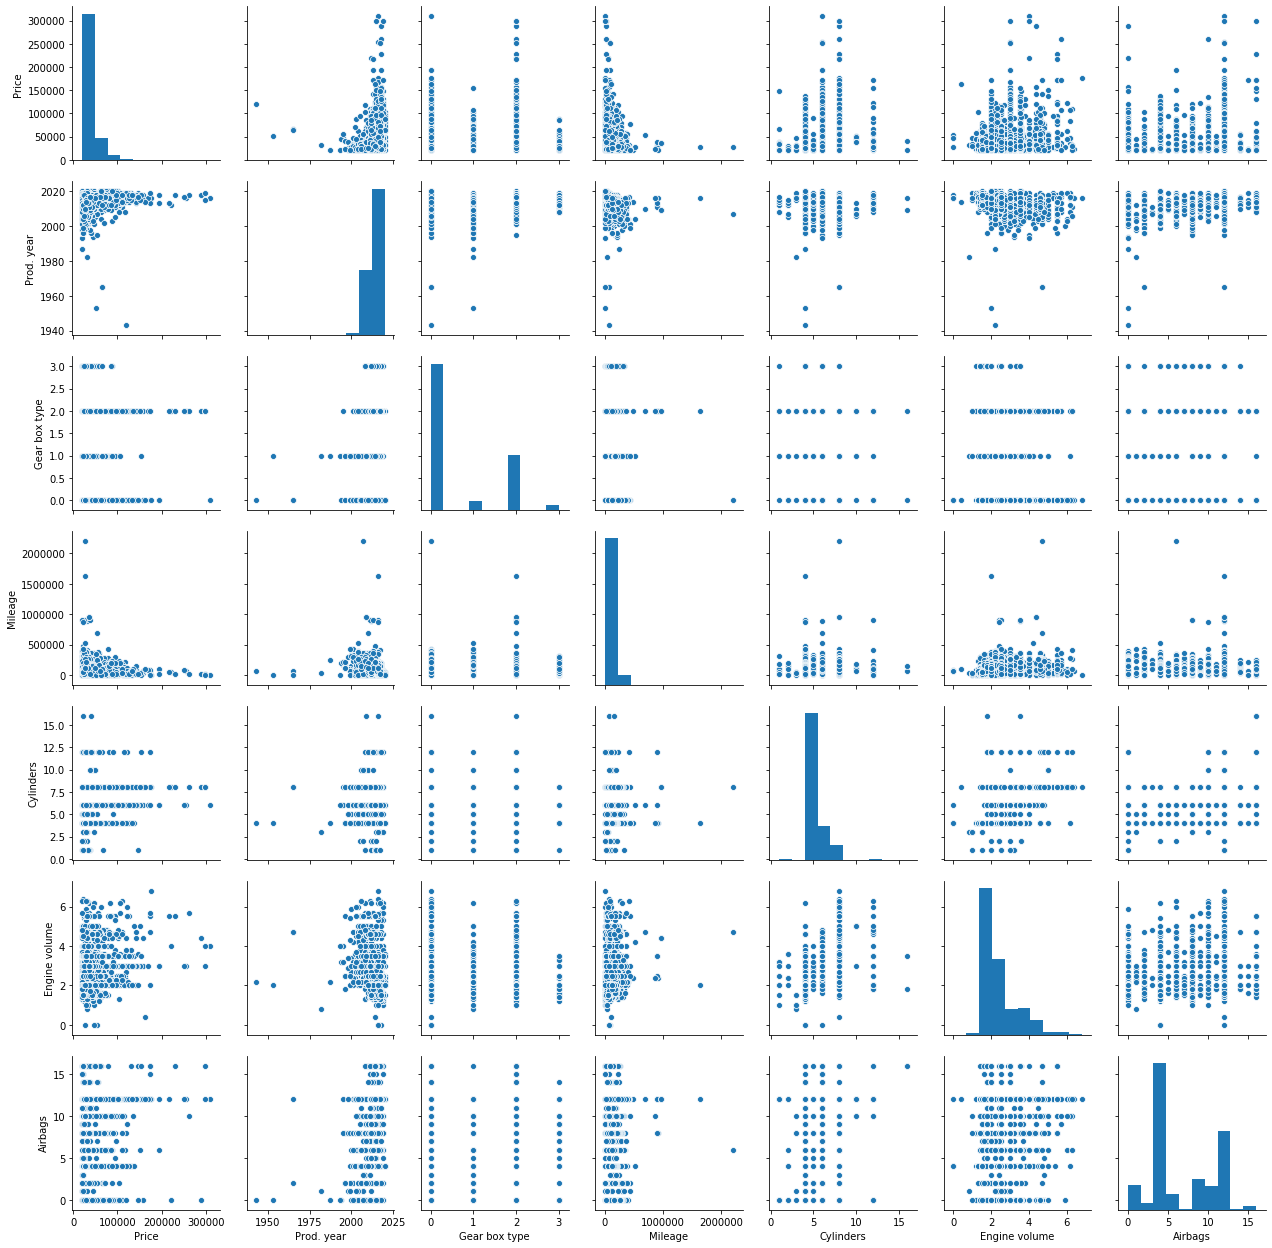

In [21]:
sns.pairplot(data1)

In [22]:
data1.dtypes

Price              int64
Prod. year         int64
Category          object
Manufacturer      object
Model             object
Gear box type      int64
Mileage            int64
Cylinders        float64
Engine volume    float64
Airbags            int64
dtype: object